# Threshold Tools 

 A single channel of an image is selected for either binary thresholding or auto thresholding (Gaussian, mean, Otsu, or triangle). For a color image, selecting a channel of an image for thresholding likely involves conversion from RGB to HSV or LAB color space, then selecting Hue, Saturation, Value, Lightness, Green-Magenta, or Blue-Yellow channels. It's best to select a channel that maximizes contrast between the target object and the background. When thresholding an image to segment a target object, it may not be possible to isolate just the target object. Multiple thresholding steps on various channels may be necessary as well as downstream noise reduction steps. For an example of this approach see the [VIS tutorial](vis_tutorial.ipynb).

In [1]:
# Import libraries 
from plantcv import plantcv as pcv


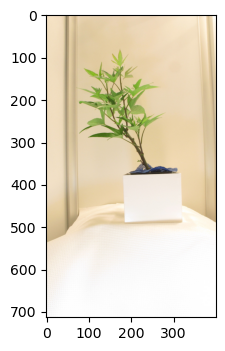

In [2]:
class options:
    def __init__(self):
        self.image = "../img/tutorial_images/vis/original_image.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.outdir = "."
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)


Each of the threshold methods take grayscale image data, and there are a few different ways to transform a color image into a gray color space. Examples of `rgb2gray_lab` and `rgb2gray_hsv` (and the way that multiple color spaces can be combined to further reduce noise) can be found in the [VIS tutorial](vis_tutorial.ipynb) and the [VIS/NIR tutorial](vis_nir_tutorial.ipynb). 

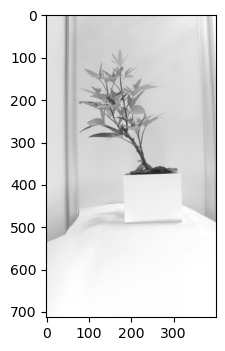

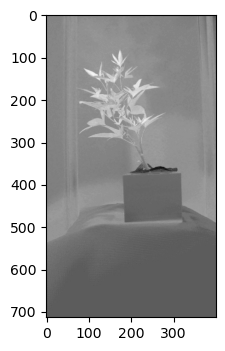

In [3]:
# Convert the RGB img to grayscale 

# Inputs:
#   rgb_img - RGB image data 
gray_img = pcv.rgb2gray(rgb_img=img)

# There isn't a lot of contrast between the plant and background, so we can use 
# the blue-yellow channel. Feel free to try other channels and/or upload your
# own images! 

# Inputs:
#    rgb_img = image object, RGB color space
#    channel = color subchannel ('l' = lightness, 'a' = green-magenta , 'b' = blue-yellow)
gray_img_b = pcv.rgb2gray_lab(rgb_img=img, channel='b')


/Users/nfahlgren/miniconda3/envs/plantcv/lib/python3.7/site-packages/plantcv-3.12.1+254.gf594e7ee.dirty-py3.7.egg/plantcv/plantcv/rgb2gray_cmyk.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/nfahlgren/miniconda3/envs/plantcv/lib/python3.7/site-packages/plantcv-3.12.1+254.gf594e7ee.dirty-py3.7.egg/plantcv/plantcv/rgb2gray_cmyk.py:41: RuntimeWarning: invalid value encountered in true_divide
/Users/nfahlgren/miniconda3/envs/plantcv/lib/python3.7/site-packages/plantcv-3.12.1+254.gf594e7ee.dirty-py3.7.egg/plantcv/plantcv/rgb2gray_cmyk.py:44: RuntimeWarning: invalid value encountered in true_divide


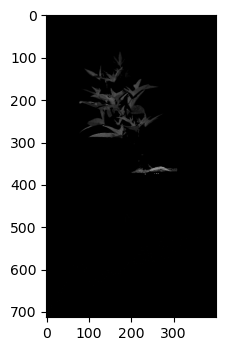

In [4]:
# Inputs:
#    rgb_img = image object, RGB color space
#    channel = color subchannel ['c' (cyan), 'm' (magenta), 'y' (yellow) or 'k' (black)]
l_channel = pcv.rgb2gray_cmyk(rgb_img=img, channel='Y')


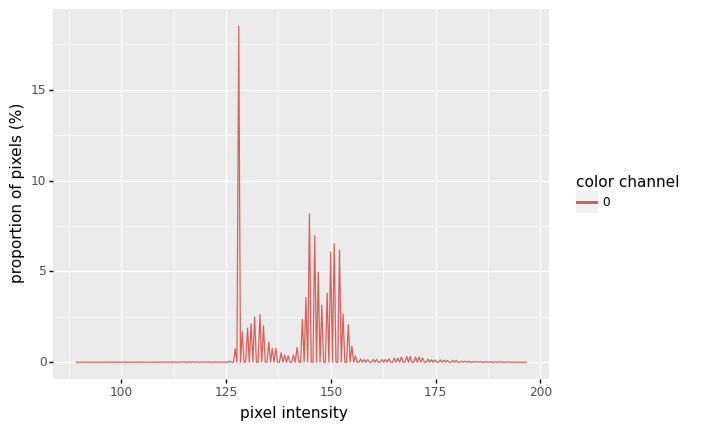

In [5]:
# Plot a histogram to help inform a reasonable threshold value 

# Inputs:
#   img - Image to analyze 
#   mask - An optional binary mask made from selected contours, default mask=None 
#   bins - Number of classes to divide the spectrum into, default bins=256
#   color - Color of line drawn (default color='red') 
#   title - cusctom title for the plot gets drawn if title is not None (default) 
hist_figure = pcv.visualize.histogram(img=gray_img_b, mask=None, bins=256)


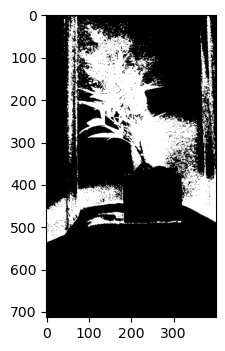

In [6]:
# Create a binary image based on a threshold value 

# Inputs:
#   gray_img - Grayscale image data 
#   threhold - Threshold value (0-255), cutoff point for thresholding 
#   max_value - Value to apply above the threshold (255 = white)
#   object_type - 'light' (default) or 'dark', if the object is lighter than the 
#                 background then standard threholding is done, but if darker than
#                 background then inverse thresholding is done. 
binary_thresh1 = pcv.threshold.binary(gray_img=gray_img_b, threshold=150, max_value=255, 
                                      object_type='light')


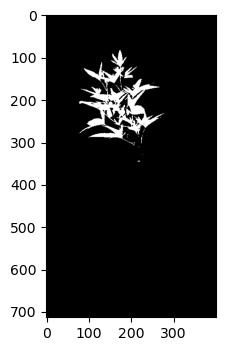

In [7]:
# Too much background got picked up. Try a higher threshold value. 
binary_thresh2 = pcv.threshold.binary(gray_img=gray_img_b, threshold=160, max_value=255, 
                                      object_type='light')


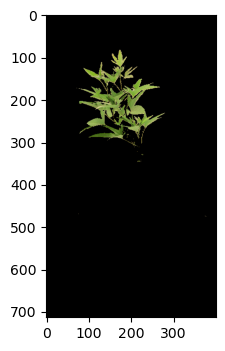

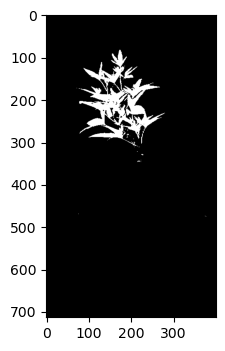

In [8]:
# Create a binary image using multiple channels 

# Inputs:
#   rgb_img - RGB image data 
#   lower_thresh - Lower threshold values
#   upper_thresh - List of upper threshold values
#   channel - Color-space channels of interest (either 'RGB', 'HSV', 'LAB', or 'gray')
mask, masked_img = pcv.threshold.custom_range(img=img, lower_thresh=[0,0,158], 
                                              upper_thresh=[255,255,255], channel='LAB')


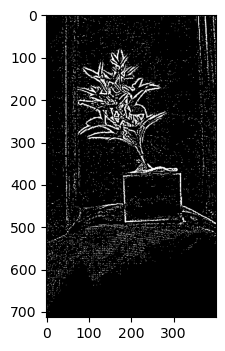

In [9]:
# Create a binary image using the Gaussian adaptive thresholding method

# Inputs:
#   gray_img - Grayscale image data 
#   max_value - Value to apply above threshold (255 = white)
#   object_type - 'light' (default) or 'dark', if the object is lighter than the 
#                 background then standard threholding is done, but if darker than
#                 background then inverse thresholding is done. 
gauss_thresh1 = pcv.threshold.gaussian(gray_img=gray_img_b, max_value=255, object_type='dark')


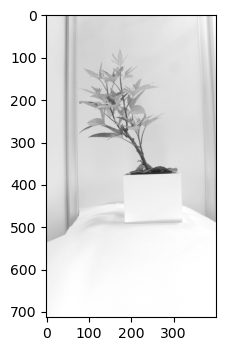

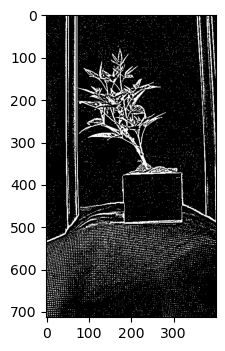

In [10]:
# Quite a bit of the plant was missed so try another color channel 
gray_img_l = pcv.rgb2gray_lab(img, 'l')

gauss_thresh2 = pcv.threshold.gaussian(gray_img_l, 255, 'dark')


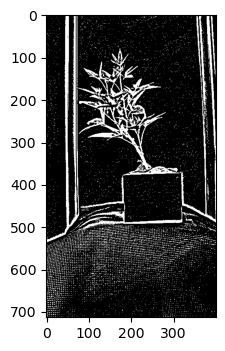

In [11]:
# Create a binary image using the mean adaptive thresholding method 

# Inputs:
#   gray_img - Grayscale image data 
#   max_value - Value to apply above threshold (255 = white)
#   object_type - 'light' (default) or 'dark', if the object is lighter than the 
#                 background then standard threholding is done, but if darker than
#                 background then inverse thresholding is done. 
mean_thresh = pcv.threshold.mean(gray_img=gray_img_l, max_value=255, object_type='dark')


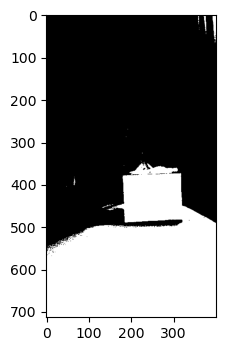

In [12]:
# Create a binary image using Otsu's method 

# Inputs:
#   gray_img - Grayscale image data 
#   max_value - Value to apply above threshold (255 = white)
#   object_type - 'light' (default) or 'dark', if the object is lighter than the 
#                 background then standard threholding is done, but if darker than
#                 background then inverse thresholding is done. 
otsu_thresh1 = pcv.threshold.otsu(gray_img=gray_img_b, max_value=255, object_type='dark')


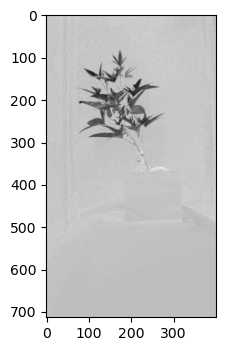

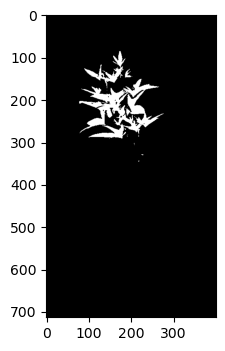

In [13]:
# The plant container and table it's sitting got picked up but the plant didn't.
# Try the green-magenta channel instead
gray_img_a = pcv.rgb2gray_lab(img, 'a')

otsu_thresh2 = pcv.threshold.otsu(gray_img_a, 255, 'dark')


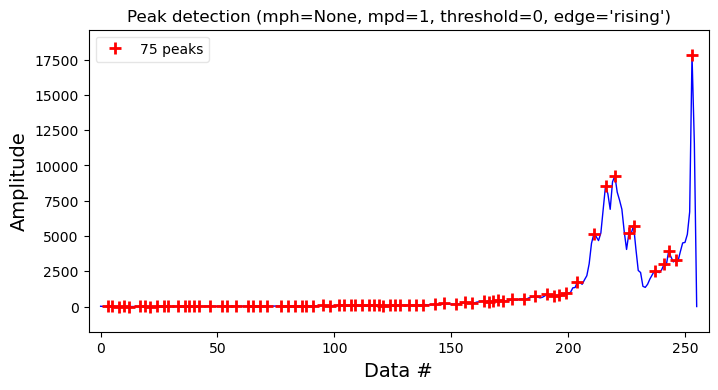

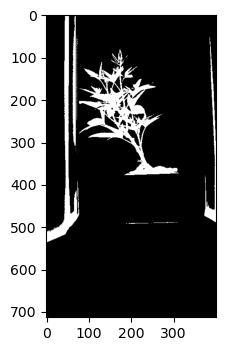

Threshold value = 253


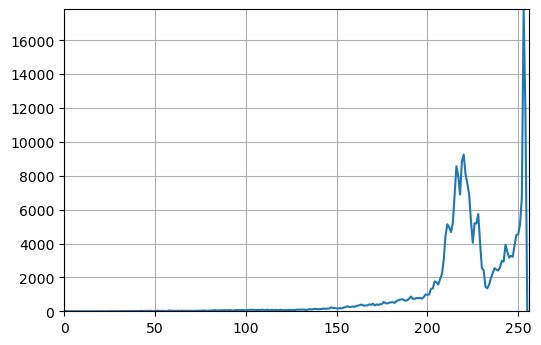

In [14]:
# Create a binary image using adaptive thresholding

# Inputs:
#   gray_img - Grayscale image data 
#   max_value - Value to apply above threshold (255 = white)
#   object_type - 'light' (default) or 'dark', if the object is lighter than the 
#                 background then standard threholding is done, but if darker than
#                 background then inverse thresholding is done. 
#   xstep - Value to move along the x-axis to determine the points from which to 
#           calculate distance (recommended to start at 1, the default, and change 
#           if needed) 
triangle_thresh = pcv.threshold.triangle(gray_img=gray_img_l, max_value=255, 
                                         object_type='dark', xstep=1)


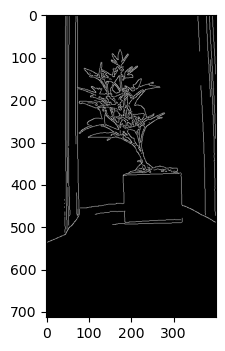

In [15]:
# Although not exactly like the rest of the thresholding functions, there is also an edge detection 
# function that can be used on RGB and grayscale images

# Inputs: 
#   img - RGB or grayscale image data
#   sigma - Optional standard deviation of the Gaussian filter
#   low_thresh - Optional lower bound for hysteresis thresholding (linking edges). If None (default) 
#                then low_thresh is set to 10% of the image's max
#   high_thresh - Optional upper bound for hysteresis thresholding (linking edges). If None (default)
#                 then high_thresh is set to 20% of the image's max
#   thickness - Optional integer thickness of the edges, default thickness=1
#   mask - Optional mask to limit the application of Canny to a certain area, takes a binary img.
#   mask_color - Color of the mask provided; either None (default), 'white', or 'black' (cannot be None 
#                if mask is provided)
#   use_quantiles - Default is False, if True then treat low_thresh and high_thresh as quantiles of the edge magnitude
#                   image, rather than the absolute edge magnitude values. If True then thresholds must be 
#                   within the range `[0, 1]`.

# Use function defaults 
edges = pcv.canny_edge_detect(img=img)



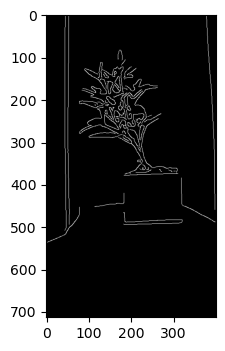

In [16]:
# sigma=2
edges2 = pcv.canny_edge_detect(img=img, sigma=2)


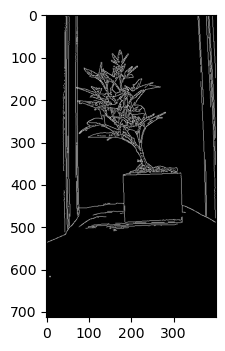

In [17]:
# Lower sigma value to pick up more edges


edges3 = pcv.canny_edge_detect(img=img, sigma=.1)


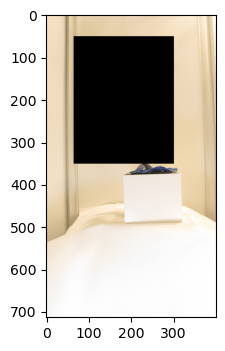

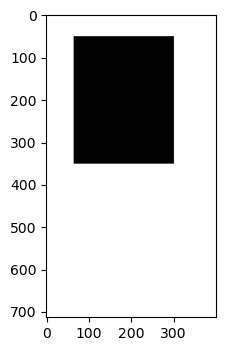

In [18]:
# Create a mask

# Inputs"
#   img - RGB or grayscale image data
#   p1 - Point at the top left corner of rectangle, (0,0) is top left corner (tuple)
#   p2 - Point at the bottom right corner of rectangle (max-value(x),max-value(y)) is bottom right corner (tuple)
#   color - "black", "gray","white", default is "black". This acts to select (mask) 
#           area from object capture (need to invert to remove).
masked, bin_img, rect_contour, hierarchy = pcv.rectangle_mask(img=img, p1=(65, 50), p2=(300,350), color='black')



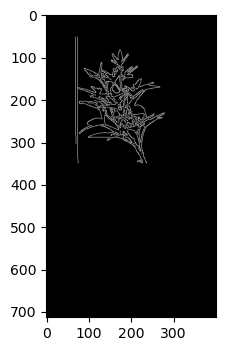

In [19]:
# Find edges within a mask
edges4 = pcv.canny_edge_detect(img=img, mask=bin_img, mask_color='black')
